### Team ID : PNT2022TMID32265

# Building a Regression Model

 ## 1. Download the dataset:

In [140]:
# yes completed.....

In [141]:
# importing the modules...

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load the dataset into the tool.

In [142]:
df=pd.read_csv("abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [143]:
# shape
df.shape

(4177, 9)

#### Additional Task

#### Convert Ring column into Age column (by adding 1.5)

In [144]:
Age = 1.5 + df.Rings
df["Age"] = Age
df = df.drop(columns=["Rings"],axis=1)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


## 3. Perform Below Visualizations.

## • Univariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Count'>

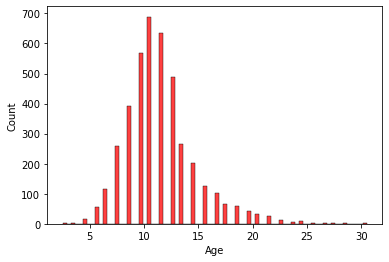

In [145]:
#univarient Analysis

sns.histplot(x=df.Age,color='Red')       # Choosing Balance column

## •Bi-Variate Analysis

<AxesSubplot:xlabel='Age', ylabel='Height'>

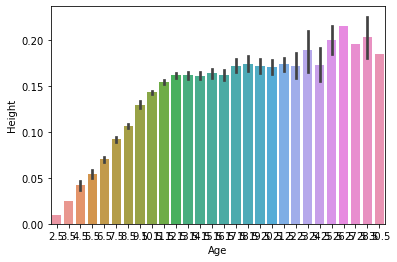

In [146]:
#bivariate analysis 

sns.barplot(x=df.Age,y=df.Height)    # Choosing Age and Height column

## • Multi-Variate Analysis

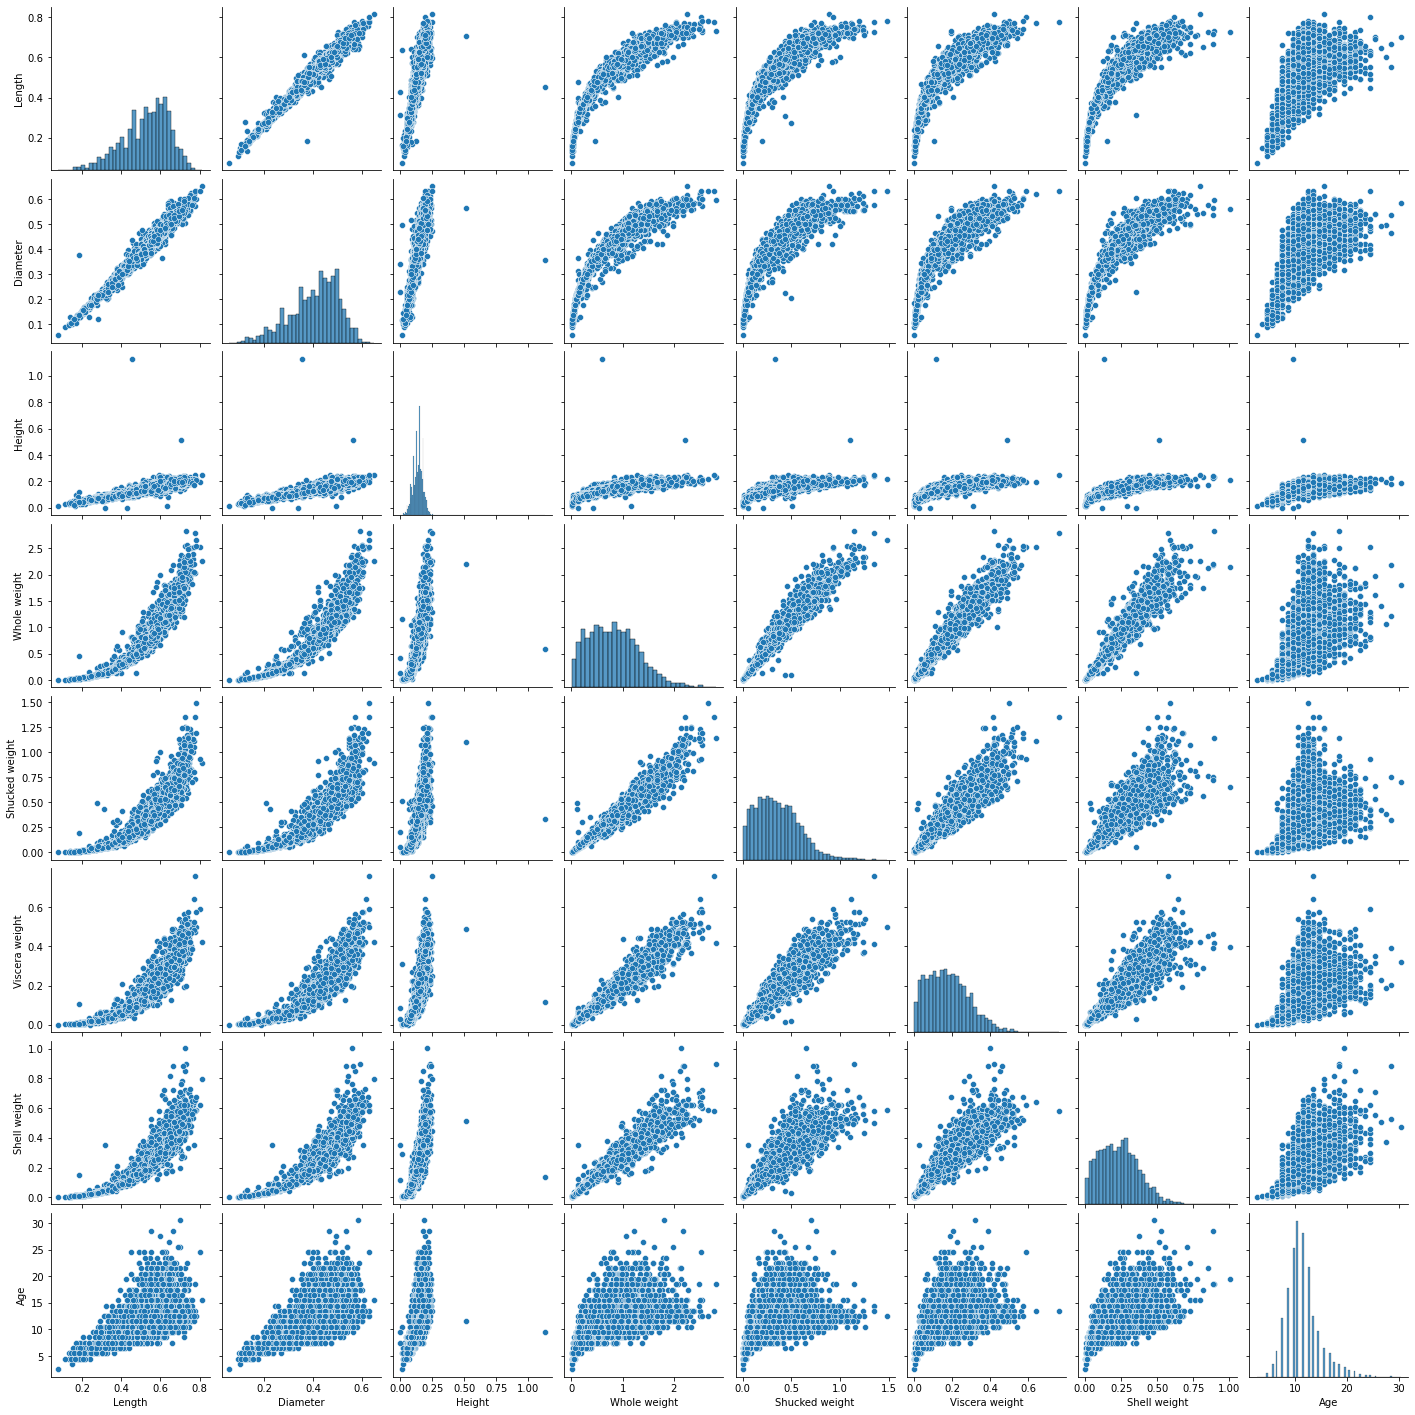

In [147]:
# Multi-Variate Analysis

sns.pairplot(df)

## 4. Perform descriptive statistics on the dataset.

In [148]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


## 5. Check for Missing values and deal with them.

In [149]:
df.isnull().any()      # to check any null 

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Age               False
dtype: bool

In [150]:
df.isnull().sum()      # to check the count of null  

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

In [151]:
# there is no missing values so we go for next step.....

## 6. Find the outliers and replace them outliers

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

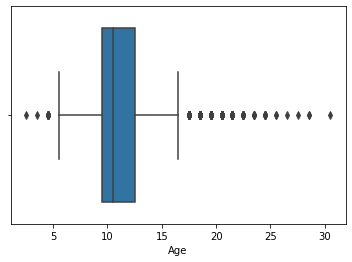

In [152]:
# outlier in Age column

sns.boxplot(df.Age)

In [153]:
outliers=df.quantile(q=(0.25,0.75))
outliers

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,9.5
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,12.5


<AxesSubplot:xlabel='Age'>

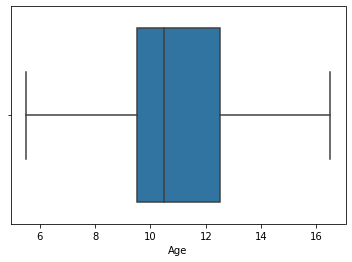

In [154]:
q1=df.Age.quantile(0.25)  #(Q1)           # Replacement using median....
q3=df.Age.quantile(0.75)  #(Q3)

IQR=q3-q1

upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

df['Age']= np.where(df['Age']<lower_limit,7,df['Age'])
sns.boxplot(x=df.Age,showfliers=False)

## 7. Check for Categorical columns and perform encoding

## • Label encoding

In [155]:
from sklearn.preprocessing import LabelEncoder        # Using Label encoding....
le=LabelEncoder()

df.Sex=le.fit_transform(df.Sex)

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


## 8. Split the data into dependent and independent variables.

## ( i ) Independent variable

In [156]:
x=df.drop(columns=['Sex'],axis = 1)
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


## ( ii ) Dependent variable

In [157]:
y = df.Sex
y.head()

0    2
1    2
2    0
3    2
4    1
Name: Sex, dtype: int32

## 9. Scale the independent variables

In [158]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(x), columns=x.columns)
X_Scaled.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.577830
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.919022
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.294809
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.017298
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.919022


## 10. Split the data into training and testing

In [159]:
# train test split

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scaled, y, test_size=0.2, random_state=0)

In [160]:
X_Train.shape

(3341, 8)

In [161]:
X_Test.shape

(836, 8)

In [162]:
Y_Train.shape

(3341,)

In [163]:
Y_Test.shape

(836,)

## 11. Build the Model

In [164]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [165]:
model.fit(X_Train,Y_Train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [166]:
y_predict = model.predict(X_Test)

In [167]:
y_predict_train = model.predict(X_Train)

## 12. Train the Model

In [168]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [169]:
print('Training accuracy: ',accuracy_score(Y_Train,y_predict_train))

Training accuracy:  0.9844357976653697


## 13. Test the Model

In [170]:
print('Testing accuracy: ',accuracy_score(Y_Test,y_predict))

Testing accuracy:  0.5478468899521531


## 14. Measure the performance using Metrics

In [171]:
pd.crosstab(Y_Test,y_predict)

col_0,0,1,2
Sex,,,
0,124,32,93
1,35,217,39
2,128,51,117


In [172]:
print(classification_report(Y_Test,y_predict))

              precision    recall  f1-score   support

           0       0.43      0.50      0.46       249
           1       0.72      0.75      0.73       291
           2       0.47      0.40      0.43       296

    accuracy                           0.55       836
   macro avg       0.54      0.55      0.54       836
weighted avg       0.55      0.55      0.55       836

